In [1]:
%matplotlib inline
import numpy as np
from skimage import data, io
import pylab

pylab.rcParams['figure.figsize'] = (7.0, 7.0)

PATH = '/home/tehada/cvintro2016/hw-02/egg_python/sea2.jpg'

def seam_carve(img, mode, mask=None):
    # dummy implementation — delete rightmost column of image
    resized_img = img[:, :-1, :]
    if mask is None:
        resized_mask = None
    else:
        resized_mask = mask[:, :-1]

    carve_mask = np.zeros(img.shape[0:2])
    carve_mask[:, -1] = 1
    return (resized_img, resized_mask, carve_mask)

def Convert_to_YUV(image):
    height = image.shape[0]
    width = image.shape[1]
    YUV_image = np.zeros((height, width))
    for h in range(height):
        for w in range(width):
            YUV_image[h][w] = int(image[h][w][0] * 0.299
                                + image[h][w][1] * 0.587
                                + image[h][w][2] * 0.114)
    YUV_image = np.uint8(YUV_image)
    return YUV_image

#сделать нормальное конвертирование
def X_derivative(h, w, image):
    width = image.shape[1]
    if w == 0:
        return int(image[h][w + 1]) - int(image[h][w])
    elif w == width - 1:
        return int(image[h][w]) - int(image[h][w - 1])
    else:
        return int(image[h][w + 1]) - int(image[h][w - 1])

#тоже
def Y_derivative(h, w, image):
    height = image.shape[0]
    if h == 0:
        return int(image[h + 1][w]) - int(image[h][w])
    elif h == height - 1:
        return int(image[h][w]) - int(image[h - 1][w])
    else:
        return int(image[h + 1][w]) - int(image[h - 1][w])

def Count_energy(YUV_image):
    height = YUV_image.shape[0]
    width = YUV_image.shape[1]
    energy_image = np.zeros((height, width))
    for h in range(height):
        for w in range(width):              
            energy_image[h][w] = int(X_derivative(h, w, YUV_image) ** 2 + (Y_derivative(h, w, YUV_image)) ** 2) ** 0.5
    energy_image = np.uint8(energy_image)
    return energy_image

def Find_min_cell(h, w, image):
    if w == 0:
        return min(image[h][w], image[h][w + 1])
    elif w == image.shape[1] - 1:
        return min(image[h][w - 1], image[h][w])
    else:
        return min(image[h][w - 1], min(image[h][w], image[h][w + 1]))
    
def Find_min_index(h, w, image):
    if w == 0:
        if image[h][w] <= image[h][w + 1]:
            return w
        else:
            return w + 1
    elif w == image.shape[1] - 1:
        if image[h][w - 1] <= image[h][w]:
            return w - 1
        else:
            return w
    else:
        if image[h][w - 1] <= image[h][w] and image[h][w - 1] <= image[h][w + 1]:
            return w - 1
        elif image[h][w] <= image[h][w + 1]:
            return w
        else:
            return w + 1

def Find_seam(energy_image):
    height = energy_image.shape[0]
    width = energy_image.shape[1]
    matrix = np.int32(np.zeros((height, width)))
    matrix[0] = energy_image[0]
    for h in range(1, height):
        for w in range(width):
            matrix[h][w] = int(Find_min_cell(h - 1, w, energy_image)) + matrix[h - 1][w]
    min_cell = matrix[h - 1][w - 1]
    min_index = width - 1
    for w in range(width - 1, -1, -1):
        if matrix[height - 1][w] <= min_cell:
            min_cell = matrix[height - 1][w]
            min_index = w
    min_cells = [min_index]
    for h in range(height - 1, 0, -1):
        min_index = Find_min_index(h - 1, min_index, matrix)
        min_cells.append(min_index)
    return min_cells

def Delete_seam(image, cells):
    height = image.shape[0]
    width = image.shape[1]
    new_image = np.empty((height, width - 1, 3))
    for h in range(height - 1, -1, -1):
        new_image[h] = np.delete(image[h], cells[height - h - 1], 0)
    return np.uint8(new_image)

def Crop(image, pixels):
    for i in range(pixels):
        YUV_image = Convert_to_YUV(image)
        energy_image = Count_energy(YUV_image)
        io.imshow(energy_image)
        seam = Find_seam(energy_image)
        image = Delete_seam(image, seam)
        print(i)
    return image

In [2]:
sea = io.imread(PATH)

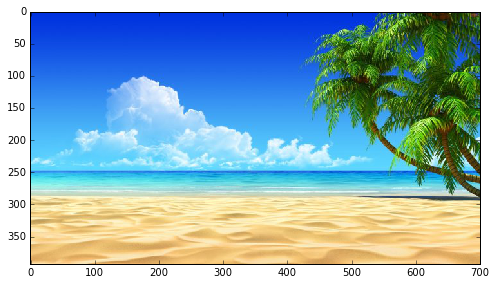

In [3]:
io.imshow(sea)

In [ ]:
image = Crop(sea, 200)

0
1
2
3
4
5
6
7
8


In [ ]:
image1 = Crop(sea, 100)

In [ ]:
image2 = Crop(sea, 300)

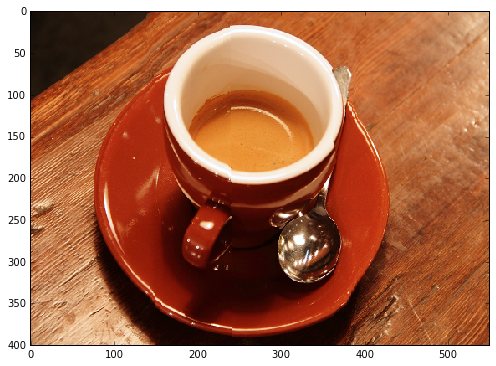

In [108]:
io.imshow(image)